In [1]:
# ============================================================================
# NOTEBOOK 1: EXPLORATORY DATA ANALYSIS (EDA.ipynb)
# ============================================================================

# Cell 1: Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [4]:
# ============================================================================
# Cell 2: Load and Inspect Data
# ============================================================================

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("=" * 80)
print("DATASET SHAPE")
print("=" * 80)
print(f"Train set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

print("\n" + "=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
print(train.head())

print("\n" + "=" * 80)
print("DATA TYPES")
print("=" * 80)
print(train.dtypes)

print("\n" + "=" * 80)
print("MISSING VALUES")
print("=" * 80)
missing = train.isnull().sum()
missing_percent = (missing / len(train)) * 100
missing_df = pd.DataFrame({
    'Feature': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_percent.values
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False))

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
print(train.describe())

DATASET SHAPE
Train set shape: (891, 12)
Test set shape: (418, 11)

FIRST 5 ROWS
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803 


SURVIVAL DISTRIBUTION
Survived
0    549
1    342
Name: count, dtype: int64

Survival Rate: 38.38%


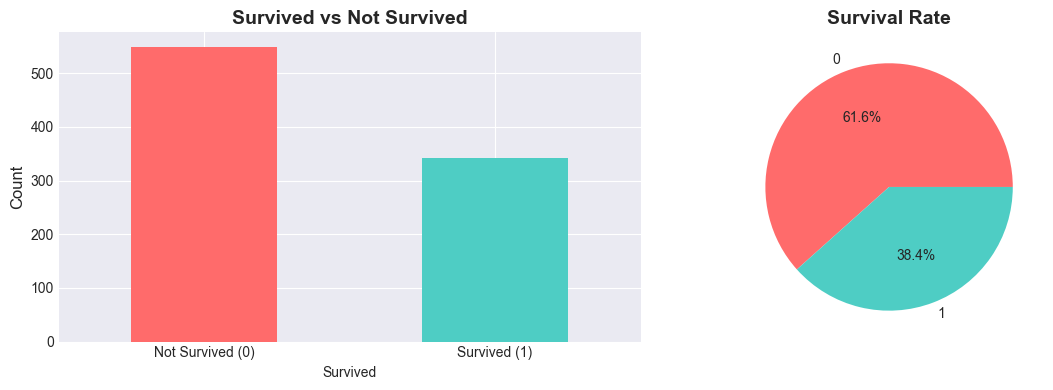

In [6]:
# ============================================================================
# Cell 3: Survival Distribution
# ============================================================================

print("\n" + "=" * 80)
print("SURVIVAL DISTRIBUTION")
print("=" * 80)
print(train['Survived'].value_counts())
print(f"\nSurvival Rate: {train['Survived'].mean():.2%}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Survival count
train['Survived'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Survived vs Not Survived', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Not Survived (0)', 'Survived (1)'], rotation=0)

# Survival percentage
train['Survived'].value_counts(normalize=True).plot(kind='pie', ax=axes[1], 
                                                     autopct='%1.1f%%', 
                                                     colors=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Survival Rate', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('01_survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


SURVIVAL BY PASSENGER CLASS
        count  sum      mean
Pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363


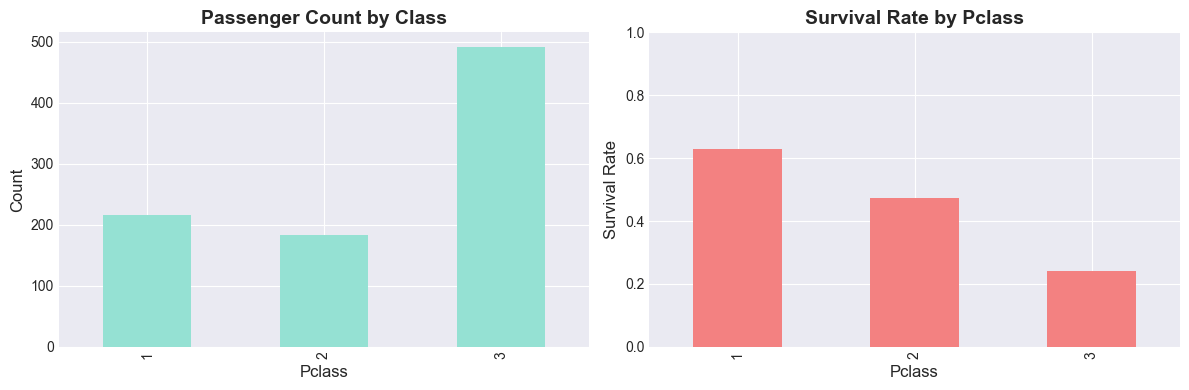

In [7]:
# ============================================================================
# Cell 4: Survival by Pclass (Passenger Class)
# ============================================================================

print("\n" + "=" * 80)
print("SURVIVAL BY PASSENGER CLASS")
print("=" * 80)
print(train.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count by class
train.groupby('Pclass')['Survived'].count().plot(kind='bar', ax=axes[0], color='#95E1D3')
axes[0].set_title('Passenger Count by Class', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('Pclass', fontsize=12)

# Survival rate by class
train.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[1], color='#F38181')
axes[1].set_title('Survival Rate by Pclass', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate', fontsize=12)
axes[1].set_xlabel('Pclass', fontsize=12)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('02_survival_by_pclass.png', dpi=300, bbox_inches='tight')
plt.show()


SURVIVAL BY SEX
        count  sum      mean
Sex                         
female    314  233  0.742038
male      577  109  0.188908


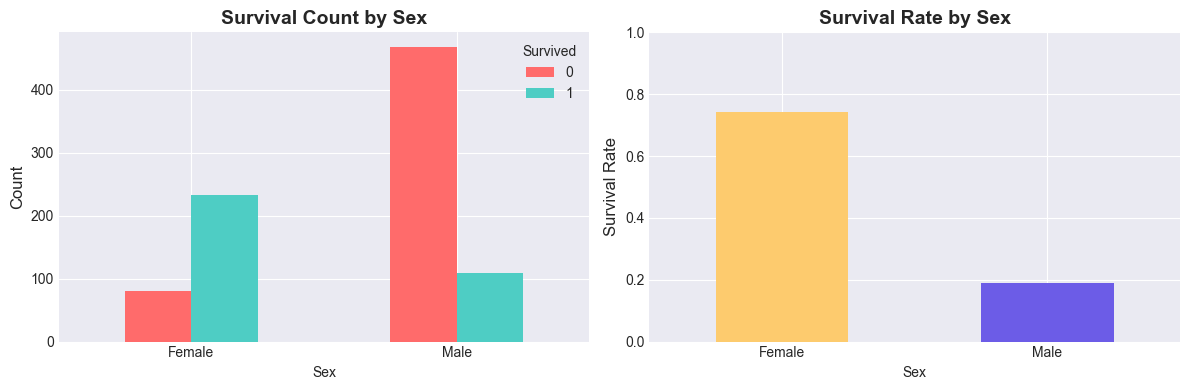

In [8]:
# ============================================================================
# Cell 5: Survival by Sex
# ============================================================================

print("\n" + "=" * 80)
print("SURVIVAL BY SEX")
print("=" * 80)
print(train.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Survival count by sex
sex_survived = train.groupby('Sex')['Survived'].value_counts().unstack()
sex_survived.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Survival Count by Sex', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Female', 'Male'], rotation=0)

# Survival rate by sex
train.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[1], color=['#FDCB6E', '#6C5CE7'])
axes[1].set_title('Survival Rate by Sex', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate', fontsize=12)
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('03_survival_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()


AGE STATISTICS
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


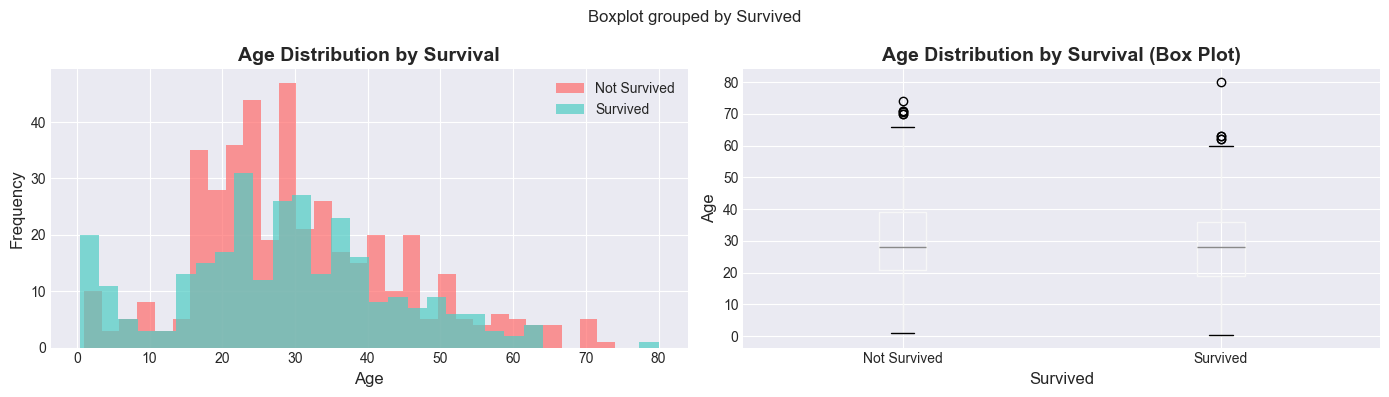

In [9]:
# ============================================================================
# Cell 6: Survival by Age
# ============================================================================

print("\n" + "=" * 80)
print("AGE STATISTICS")
print("=" * 80)
print(train['Age'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Age distribution by survival
train[train['Survived'] == 0]['Age'].hist(bins=30, ax=axes[0], alpha=0.7, label='Not Survived', color='#FF6B6B')
train[train['Survived'] == 1]['Age'].hist(bins=30, ax=axes[0], alpha=0.7, label='Survived', color='#4ECDC4')
axes[0].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()

# Box plot
train.boxplot(column='Age', by='Survived', ax=axes[1])
axes[1].set_title('Age Distribution by Survival (Box Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Survived', fontsize=12)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].set_xticklabels(['Not Survived', 'Survived'])

plt.tight_layout()
plt.savefig('04_survival_by_age.png', dpi=300, bbox_inches='tight')
plt.show()



FARE STATISTICS
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


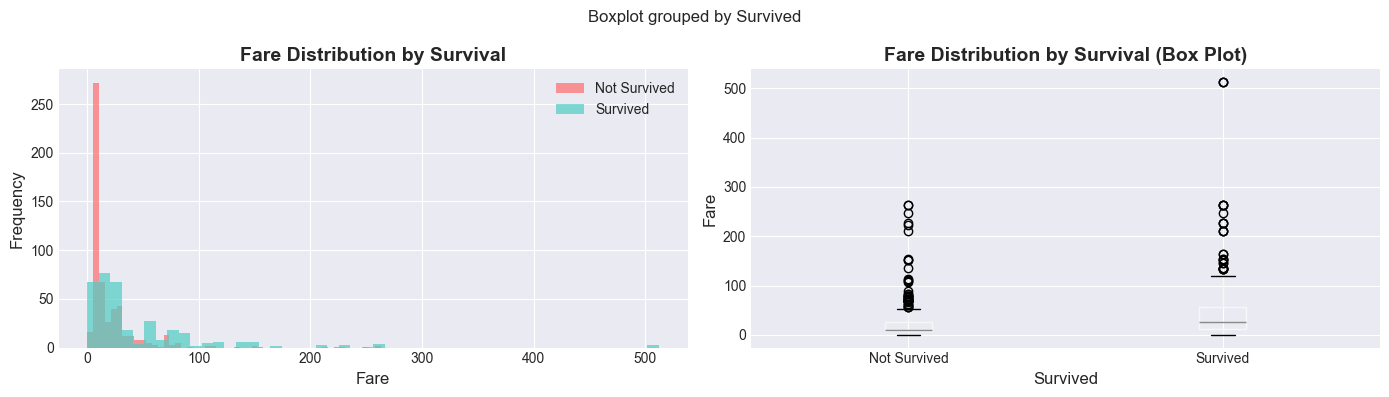

In [10]:

# ============================================================================
# Cell 7: Survival by Fare
# ============================================================================

print("\n" + "=" * 80)
print("FARE STATISTICS")
print("=" * 80)
print(train['Fare'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Fare distribution by survival
train[train['Survived'] == 0]['Fare'].hist(bins=50, ax=axes[0], alpha=0.7, label='Not Survived', color='#FF6B6B')
train[train['Survived'] == 1]['Fare'].hist(bins=50, ax=axes[0], alpha=0.7, label='Survived', color='#4ECDC4')
axes[0].set_title('Fare Distribution by Survival', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fare', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()

# Box plot
train.boxplot(column='Fare', by='Survived', ax=axes[1])
axes[1].set_title('Fare Distribution by Survival (Box Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Survived', fontsize=12)
axes[1].set_ylabel('Fare', fontsize=12)
axes[1].set_xticklabels(['Not Survived', 'Survived'])

plt.tight_layout()
plt.savefig('05_survival_by_fare.png', dpi=300, bbox_inches='tight')
plt.show()



FAMILY RELATIONS ANALYSIS

Family Size Statistics:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


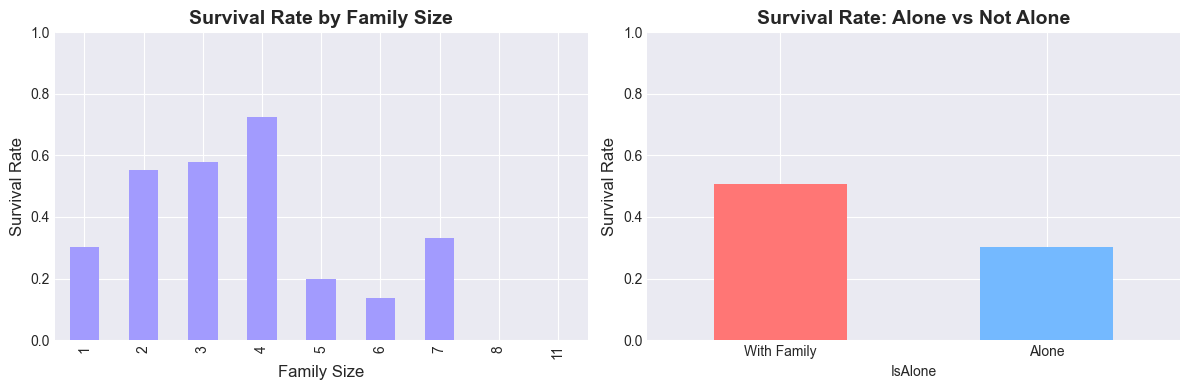

In [11]:
# ============================================================================
# Cell 8: Family Relations (SibSp + Parch)
# ============================================================================

print("\n" + "=" * 80)
print("FAMILY RELATIONS ANALYSIS")
print("=" * 80)

# Create family size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

print("\nFamily Size Statistics:")
print(train['FamilySize'].value_counts().sort_index())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Family size vs survival
family_survival = train.groupby('FamilySize')['Survived'].agg(['count', 'mean'])
family_survival['mean'].plot(kind='bar', ax=axes[0], color='#A29BFE')
axes[0].set_title('Survival Rate by Family Size', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Survival Rate', fontsize=12)
axes[0].set_xlabel('Family Size', fontsize=12)
axes[0].set_ylim(0, 1)

# Solo vs group
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
train.groupby('IsAlone')['Survived'].mean().plot(kind='bar', ax=axes[1], color=['#FF7675', '#74B9FF'])
axes[1].set_title('Survival Rate: Alone vs Not Alone', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate', fontsize=12)
axes[1].set_xticklabels(['With Family', 'Alone'], rotation=0)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('06_family_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



EMBARKED PORT ANALYSIS
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


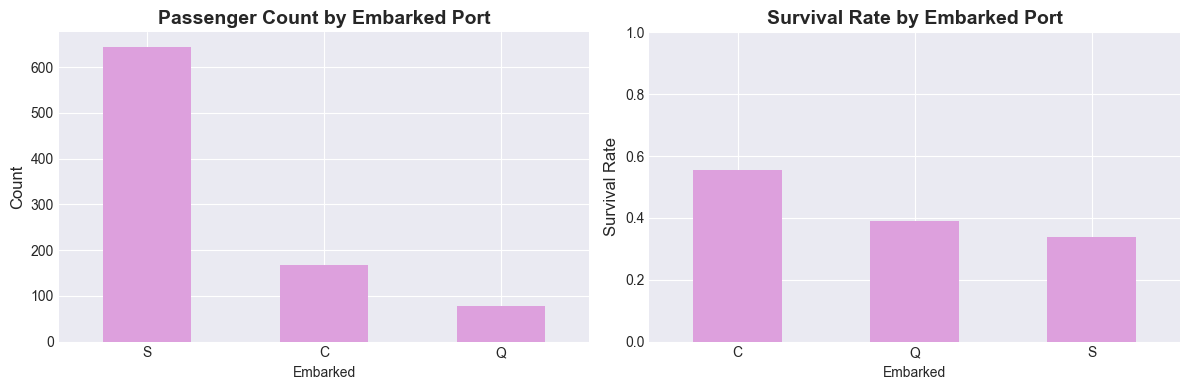

In [12]:
# ============================================================================
# Cell 9: Embarked Port Analysis
# ============================================================================

print("\n" + "=" * 80)
print("EMBARKED PORT ANALYSIS")
print("=" * 80)
print(train['Embarked'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count by embarked
train['Embarked'].value_counts().plot(kind='bar', ax=axes[0], color='#DDA0DD')
axes[0].set_title('Passenger Count by Embarked Port', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Survival rate by embarked
train.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=axes[1], color='#DDA0DD')
axes[1].set_title('Survival Rate by Embarked Port', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('07_embarked_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


CORRELATION ANALYSIS
                  Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived          1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
Pclass           -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age              -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp            -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch             0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare              0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
Sex_encoded       0.543351 -0.131900 -0.093254  0.114631  0.245489  0.182333   
Embarked_encoded  0.108669  0.043835  0.012186 -0.060606 -0.079320  0.063462   

                  Sex_encoded  Embarked_encoded  
Survived             0.543351          0.108669  
Pclass              -0.131900          0.043835  
Age                 -0.093254          0.012186  
SibSp                0.114631         -0.060606  
Parch  

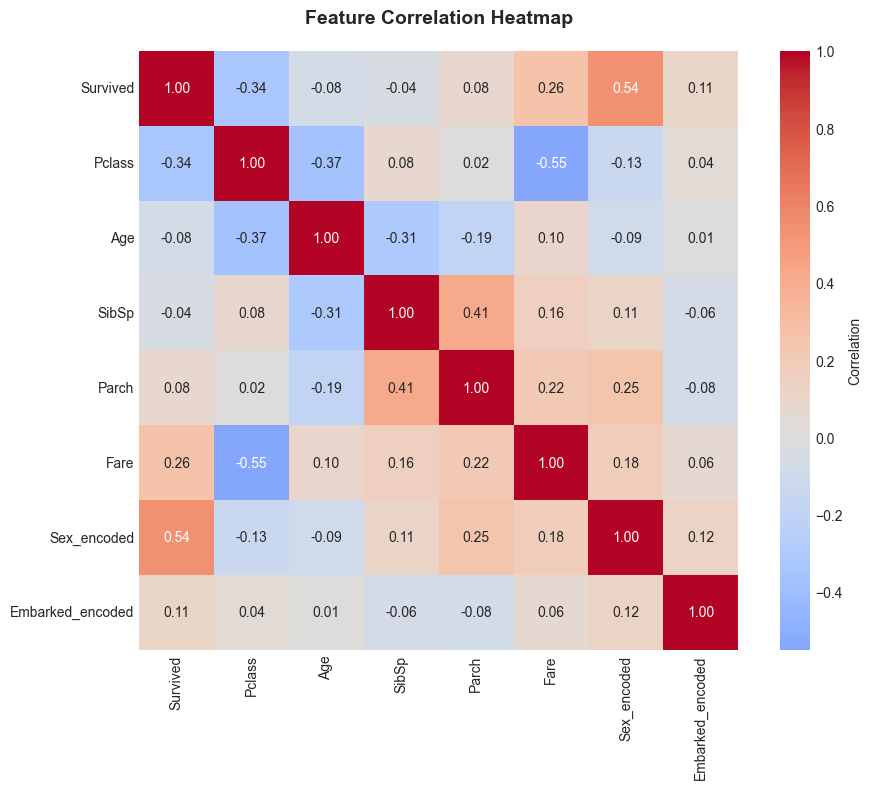


KEY INSIGHTS FROM EDA

1. SURVIVAL RATE: ~38% passengers survived
2. SEX: Strong predictor - 74% females survived vs 19% males
3. PCLASS: First class had highest survival (63%), third class lowest (24%)
4. AGE: Children more likely to survive (women and children first policy)
5. FARE: Higher fares correlate with higher survival (proxy for class)
6. FAMILY: Solo travelers less likely to survive than those with family
7. MISSING DATA: Age (177 missing), Embarked (2 missing), Cabin (687 missing)



In [13]:
# ============================================================================
# Cell 10: Correlation Heatmap
# ============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Prepare data for correlation
df_corr = train.copy()
df_corr['Sex_encoded'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked_encoded'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

correlation_matrix = df_corr[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_encoded']].corr()

print(correlation_matrix)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('08_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("KEY INSIGHTS FROM EDA")
print("=" * 80)
print("""
1. SURVIVAL RATE: ~38% passengers survived
2. SEX: Strong predictor - 74% females survived vs 19% males
3. PCLASS: First class had highest survival (63%), third class lowest (24%)
4. AGE: Children more likely to survive (women and children first policy)
5. FARE: Higher fares correlate with higher survival (proxy for class)
6. FAMILY: Solo travelers less likely to survive than those with family
7. MISSING DATA: Age (177 missing), Embarked (2 missing), Cabin (687 missing)
""")